# Pandas
<!-- requirement: img/Data_Frame_Data_Series.png -->
<!-- requirement: small_data/fha_by_tract.csv -->
<!-- requirement: small_data/2013_Gaz_tracts_national.tsv -->

Pandas is Python's answer to R.  It's a good tool for small(ish) data analysis -- i.e. when everything fits into memory.

The basic new "noun" in pandas is the **data frame**.

## Nouns (objects) in Pandas

### Data Frames

Like a table, with rows and columns (e.g. as in SQL).  Except:
  - The rows can be indexed by something interesting (there is special support for labels like categorical and timeseries data).  This is especially useful when you have timeseries data with potentially missing data points.
  - Cells can store Python objects. Like in SQL, columns are type homogeneous.
  - Instead of "NULL", the name for a non-existent value is "NA".  Unlike R, Python's data frames only support NAs in columns of some data types (basically: floating point numbers and 'objects') -- but this is mostly a non-issue (because it will "up-cast" integers to float64, etc.)
  
### Data Series:

These are named columns of a DataFrame (more correctly, a dataframe is a dictionary of Series).  The entries of the series have homogenous type.

![img/4-pandas/Data_Frame_Data_Series.png](img/4-pandas/Data_Frame_Data_Series.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# a data frame
df1 = pd.DataFrame({
    'number': [1, 2, 3],
    'animal': ['cat', 'dog', 'mouse']
})

df1

,number,animal
0,1,cat
1,2,dog
2,3,mouse


In [2]:
# select the animal series from the dataframe using the different notations
df1['animal']

0      cat
1      dog
2    mouse
Name: animal, dtype: object

In [3]:
df1.animal

0      cat
1      dog
2    mouse
Name: animal, dtype: object

In [4]:
# show the types of the dataframe columns
df1.dtypes

number     int64
animal    object
dtype: object

In [5]:
df1['number'] = df1['number'].astype(float)

In [6]:
df1

,number,animal
0,1.0,cat
1,2.0,dog
2,3.0,mouse


In [7]:
# the same data frame
df2 = pd.DataFrame([
    ('cat', 1),
    ('dog', 3),
    ('mouse', 3),
], columns=['animal', 'number'])

df2

,animal,number
0,cat,1
1,dog,3
2,mouse,3


## Verbs (operations) in Pandas
  
Pandas provides a "batteries-included" basic data analysis:
  - **Loading data:** `read_csv`, `read_table`, `read_sql`, and `read_html`
  - **Selection, filtering, and aggregation** (i.e. SQL-type operations): There's a special syntax for `SELECT`ing.  There's the `merge` method for `JOIN`ing.  There's also an easy syntax for what in SQL is a mouthful: Creating a new column whose value is computed from another column -- with the bonus that now the computations can use the full power of Python (though it might be faster if it didn't).
  - **"Pivot table" style aggregation:** If you're an Excel cognoscenti, you may appreciate this.
  - **NA handling:** Like R's data frames, there is good support for transforming NA values with default values / averaging tricks / etc.
  - **Basic statistics:** e.g. `mean`, `median`, `max`, `min`, and the convenient `describe`.
  - **Plugging into more advanced analytics:** Okay, this isn't batteries included.  But still, it plays reasonably with `sklearn`.
  - **Visualization:** For instance `plot` and `hist`.
  
We'll go through a little on all of these in the context of an example.

We're going to explore a dataset of mortgage insurance issued by the Federal Housing Authority (FHA).  The data is broken down by census tract and tells us how big of a player the FHA is in each tract (how many homes etc.).

## Loading data (and basic statistics / visualization)

In [8]:
names =["State_Code", "County_Code", "Census_Tract_Number",
        "NUM_ALL", "NUM_FHA", "PCT_NUM_FHA", "AMT_ALL",
        "AMT_FHA", "PCT_AMT_FHA"]

df = pd.read_csv('data/fha_by_tract.csv', names=names)  # Loading a CSV file, without a header (so we have to provide field names)

df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0


In [9]:
names =["StateCode", "County_Code", "Census_Tract_Number",
        "NUM_ALL", "NUM_FHA", "PCT_NUM_FHA", "AMT_ALL",
        "AMT_FHA", "PCT_AMT_FHA"]

df.columns = names

In [10]:
df = df.rename(columns={"StateCode":"State_Code"})

In [11]:
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0


In [12]:
## Create a new column from a combination of the others 'Census_Tract_Number', 'County_Code'] and 'State_Code'
df['GEOID'] = df['Census_Tract_Number']*100 + 10**6 * df['County_Code'] \
    + 10**9 * df['State_Code']   # A computed field!
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10


To drop a column:

In [13]:
column_to_drop = 'GEOID'
df.drop(column_to_drop, axis = 1).head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0


Most operations produce copies (unless `inplace=True` is specified).  The `df` object still has the GEOID column.

In [14]:
column_to_drop in df.columns

True

In [15]:
# To use inplace=True is not advised. It is better to assign the transformed dataframe to a new variable

df_new = df.drop(column_to_drop, axis = 1)

print(column_to_drop in df.columns)

print(column_to_drop in df_new.columns)

True
False


Rows can also be dropped.  Note that the indices do not reset.  The index is associated with the row, not with the order.

In [16]:
df.drop(0, axis=0).head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10
5,12.0,86.0,9808.00,1,1,100.0,188,188,100.0,1.208698e+10


By default, rows are indexed by their position.  However, any column can be made into an index:

In [17]:
df.set_index('State_Code').head(6)

,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
State_Code,,,,,,,,,
8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN
28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10
40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN
39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10
12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10
12.0,86.0,9808.00,1,1,100.0,188,188,100.0,1.208698e+10


Multiple levels of indexing is possible:

In [18]:
df.set_index(['State_Code', 'County_Code']).head(6)

Census_Tract_Number  NUM_ALL  NUM_FHA  PCT_NUM_FHA  \
State_Code County_Code                                                       
8.0        75.0                         NaN        1        1        100.0   
28.0       49.0                      103.01        1        1        100.0   
40.0       3.0                          NaN        1        1        100.0   
39.0       113.0                     603.00        3        3        100.0   
12.0       105.0                     124.04        2        2        100.0   
           86.0                     9808.00        1        1        100.0   

                        AMT_ALL  AMT_FHA  PCT_AMT_FHA         GEOID  
State_Code County_Code                                               
8.0        75.0             258      258        100.0           NaN  
28.0       49.0              71       71        100.0  2.804901e+10  
40.0       3.0              215      215        100.0           NaN  
39.0       113.0            206      206        100.0  3.911306e+10  
12.0       105.0            303      303        100.0  1.210501e+10  
           86.0             188      188        100.0  1.208698e+10

An index can be turned back into a column:

In [19]:
df.set_index('State_Code').reset_index().head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10


In [20]:
print("Percentage of mortages in each census tract insured by FHA")
df['PCT_AMT_FHA'].describe()

Percentage of mortages in each census tract insured by FHA


count    72035.000000
mean        29.703179
std         24.037779
min          0.000000
25%         10.780800
50%         24.753900
75%         44.207550
max        100.000000
Name: PCT_AMT_FHA, dtype: float64

In [21]:
# Apply describe to the entire dataframe
df.describe()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
count,72034.000000,71984.000000,71040.000000,72035.000000,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,7.104000e+04
mean,28.322528,85.612636,2534.598023,36.970389,9.741667,28.566878,7.886092e+03,1689.278851,29.703179,2.837319e+10
std,16.459507,98.672445,3451.173223,53.975403,15.187832,22.404545,1.302542e+04,2800.346300,24.037779,1.648784e+10
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000,1.001020e+09
25%,13.000000,29.000000,103.020000,13.000000,2.000000,11.111100,1.551000e+03,281.000000,10.780800,1.301596e+10
50%,28.000000,63.000000,442.010000,27.000000,6.000000,25.000000,4.168000e+03,932.000000,24.753900,2.804900e+10
75%,42.000000,109.000000,4503.012500,48.000000,13.000000,41.935500,9.668000e+03,2197.000000,44.207550,4.200348e+10
max,72.000000,840.000000,9922.010000,9477.000000,1932.000000,100.000000,1.575871e+06,331515.000000,100.000000,7.215375e+10


In [22]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

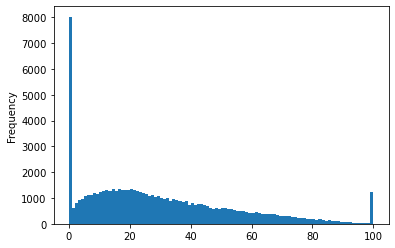

In [23]:
# plot an histogram of the column PCT_AMT_FHA
df['PCT_AMT_FHA'].plot(kind='hist', bins=100)

The above distribution looks skewed, so let's look at its logarithm.

count    72035.000000
mean         8.170124
std          1.429644
min          1.098612
25%          7.347300
50%          8.335431
75%          9.176680
max         14.270319
Name: LOG_AMT_ALL, dtype: float64


<AxesSubplot:>

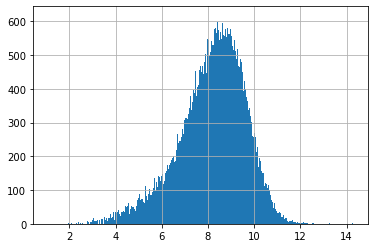

In [24]:
df['LOG_AMT_ALL'] = np.log1p(df['AMT_ALL'])  # Create a new column to examine
print(df['LOG_AMT_ALL'].describe())

df['AMT_ALL'].apply(np.log1p).hist(bins=500)  # Or apply a function to each element

## Indexing data frames

Indexing by a column name yields a data series.

In [25]:
df['State_Code'].head()

0     8.0
1    28.0
2    40.0
3    39.0
4    12.0
Name: State_Code, dtype: float64

Indexing by a list of column names gives another data frame.

In [26]:
df[['State_Code', 'County_Code']].head()

,State_Code,County_Code
0,8.0,75.0
1,28.0,49.0
2,40.0,3.0
3,39.0,113.0
4,12.0,105.0


**Question:** What will this return?

In [27]:
type(df[['State_Code']])

pandas.core.frame.DataFrame

In [28]:
df[['State_Code']].head()

,State_Code
0,8.0
1,28.0
2,40.0
3,39.0
4,12.0


A data frame is an iterator that yields the column names:

In [29]:
[col for col in df]

['State_Code',
 'County_Code',
 'Census_Tract_Number',
 'NUM_ALL',
 'NUM_FHA',
 'PCT_NUM_FHA',
 'AMT_ALL',
 'AMT_FHA',
 'PCT_AMT_FHA',
 'GEOID',
 'LOG_AMT_ALL']

To select specific rows, you can try:

In [30]:
df[:3]

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,5.556828
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,4.276666
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,5.375278


To index a particular element of the frame, use the `.loc` attribute.  It takes index and column names.

In [31]:
df.loc[:3]

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,5.556828
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,4.276666
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,5.375278
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,5.332719


In [32]:
df.loc[3, 'State_Code']

39.0

Both can be sliced.

> Unusually for Python, both endpoints are included in the slice.

In [33]:
df.loc[0:3, ['State_Code','Census_Tract_Number']]

,State_Code,Census_Tract_Number
0,8.0,NaN
1,28.0,103.01
2,40.0,NaN
3,39.0,603.00


Position-based indexing is available in the `.iloc` attribute.

In [34]:
df.iloc[3, 0:3]

State_Code              39.0
County_Code            113.0
Census_Tract_Number    603.0
Name: 3, dtype: float64

In [35]:
pd.__version__

'1.1.3'

The usual slicing convention is used for `.iloc`.

In [36]:
df.iloc[0:3, 0:3]

,State_Code,County_Code,Census_Tract_Number
0,8.0,75.0,NaN
1,28.0,49.0,103.01
2,40.0,3.0,NaN


## Filtering data

Now the `df[...]` notation is very flexible:
  - It accepts column names (strings and lists of strings);
  - It accepts column numbers (so long as there is no ambiguity with column names);
  - It accepts _binary data series!_
  
This means that you can write
```python

 df[ df['column_name2'] == 'MD' & ( df['column_name1']==5 | df['column_name1']==6 ) ]
```   
for what you would write in SQL as

```sql
SELECT * FROM df
WHERE column_name2="MD" AND (column_name1=5 OR column_name1=6)
```           
Boolean operators on a data frame return a data series of bools.

In [37]:
(df['State_Code'] == 1).head()

0    False
1    False
2    False
3    False
4    False
Name: State_Code, dtype: bool

These can be combined with the (bitwise) boolean operators.  Note that, due to operator precedence, you want to wrap the individual comparisons in parentheses.

In [38]:
((df['State_Code'] == 1) & (df['Census_Tract_Number'] == 9613)).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

Data frames accept indexing by boolean series.

In [39]:
df[df['State_Code'] == 5][['State_Code', 'County_Code']].head()

,State_Code,County_Code
77,5.0,119.0
186,5.0,69.0
904,5.0,119.0
986,5.0,119.0
1252,5.0,119.0


**Note:** select rows by binary data series only if they share the same data index!

**Exercise:**
1. Plot the histogram of percentages for different states in the same graph to compare them.
2. Notice that there is a spike at 100%.  This means that the FHA has insured 100% of the houses in that census tract.  See what happens to the histogram when we restrict it to the case where the total number of loans is non-negligible.

## Joining data

The analogue of a

```sql         
    SELECT * 
    FROM df1 INNER JOIN df2 
    ON df1.field_name=df2.field_name;
```

is

```python
    df_joined = df1.merge(df2, on='field_name')
```

You can also do left / right / outer joins, mix-and-match column names, etc.  For that consult the Pandas documentation. (The example below will do a left join.)

Of course, just looking at the distribution of insurance by census tract isn't interesting unless we know more about the census tract.

In [40]:
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,5.556828
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,4.276666
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,5.375278
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,5.332719
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10,5.717028


In [41]:
# The first row is the column names, so we don't have to specify those
df_geo = pd.read_csv('data/2013_Gaz_tracts_national.tsv', sep='\t')
df_geo.head()

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001020100,9809939,36312,3.788,0.014,32.481794,-86.490249
1,AL,1001020200,3340498,5846,1.290,0.002,32.475758,-86.472468
2,AL,1001020300,5349274,9054,2.065,0.003,32.474024,-86.459703
3,AL,1001020400,6382705,16244,2.464,0.006,32.471030,-86.444835
4,AL,1001020500,11397734,48412,4.401,0.019,32.458916,-86.421817


In [42]:
df_joined = df.merge(df_geo, on='GEOID', how='left')
df_joined.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,5.556828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,4.276666,MS,8162270.0,22648.0,3.151,0.009,32.365904,-90.262379
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,5.375278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,5.332719,OH,5382347.0,0.0,2.078,0.000,39.729932,-84.268323
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10,5.717028,FL,105120002.0,1800522.0,40.587,0.695,28.224489,-81.739745


## Aggregating data

The analog of SQL's `GROUP BY` is

    grouped = df.groupby(['field_name1', ...])...

The above is analogous to
>             
    SELECT mean(df.value1), std(df.value2) 
        FROM df
        GROUP BY df.field_name1, ...

Pandas is somewhat more flexible in how you can use grouping, not requiring you to specify an aggregation function up front.  The `.groupby()` method that can later be aggregated.

In [43]:
usps_groups = df_joined.groupby('USPS')
usps_groups

The reason Pandas doesn't require you to specify an aggregation function up front is because the groupby method by itself does little work. It returns a `DataFrameGroupBy` datatype that contains a dictionary of group keys to lists of row numbers.

In [44]:
print(type(usps_groups.groups))
usps_groups.groups['AK'][:5]

<class 'pandas.io.formats.printing.PrettyDict'>


Int64Index([91, 298, 536, 2528, 4146], dtype='int64')

In [45]:
usps_groups.groups.keys()


dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

I can retrieve the group of data associated with one key:

In [46]:
usps_groups.get_group('AK')[:5]

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
91,2.0,50.0,3.0,1,1,100.0000,121,121,100.0000,2.050000e+09,4.804021,AK,4.930719e+10,6.258804e+08,19037.615,241.654,61.468804,-156.692206
298,2.0,20.0,4.0,1,1,100.0000,192,192,100.0000,2.020000e+09,5.262690,AK,5.336808e+07,2.393787e+07,20.606,9.242,61.266668,-149.830858
536,2.0,122.0,1.0,1,1,100.0000,39,39,100.0000,2.122000e+09,3.688879,AK,1.982658e+10,1.006239e+10,7655.087,3885.112,60.123779,-152.841141
2528,2.0,185.0,1.0,11,8,72.7273,1958,1604,81.9203,2.185000e+09,7.580189,AK,2.532416e+08,3.781985e+08,97.777,146.023,71.287938,-156.685618
4146,2.0,122.0,12.0,3,2,66.6667,530,392,73.9623,2.122001e+09,6.274762,AK,2.498757e+09,4.721135e+09,964.775,1822.840,59.356474,-151.771450


Observe that this is the same as:

In [47]:
df_joined.iloc[usps_groups.groups['AK'][:5]]

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
91,2.0,50.0,3.0,1,1,100.0000,121,121,100.0000,2.050000e+09,4.804021,AK,4.930719e+10,6.258804e+08,19037.615,241.654,61.468804,-156.692206
298,2.0,20.0,4.0,1,1,100.0000,192,192,100.0000,2.020000e+09,5.262690,AK,5.336808e+07,2.393787e+07,20.606,9.242,61.266668,-149.830858
536,2.0,122.0,1.0,1,1,100.0000,39,39,100.0000,2.122000e+09,3.688879,AK,1.982658e+10,1.006239e+10,7655.087,3885.112,60.123779,-152.841141
2528,2.0,185.0,1.0,11,8,72.7273,1958,1604,81.9203,2.185000e+09,7.580189,AK,2.532416e+08,3.781985e+08,97.777,146.023,71.287938,-156.685618
4146,2.0,122.0,12.0,3,2,66.6667,530,392,73.9623,2.122001e+09,6.274762,AK,2.498757e+09,4.721135e+09,964.775,1822.840,59.356474,-151.771450


In [48]:
usps_groups.mean().head()  # Takes the mean of the rows in each group

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
USPS,,,,,,,,,,,,,,,,,
AK,2.0,98.357616,9.449338,49.079470,12.251656,27.172880,12450.741722,2905.072848,27.456326,2.098359e+09,8.791516,4.658549e+09,9.506639e+08,1798.675881,367.053397,61.124912,-148.239871
AL,1.0,75.836331,1889.544523,32.163669,8.333633,28.754330,5189.795863,1112.598022,29.368947,1.076025e+09,7.607937,1.132807e+08,2.623693e+06,43.737926,1.013006,32.961141,-86.761186
AR,5.0,78.663690,3196.877113,37.946429,8.427083,21.377452,5377.254464,1105.171131,22.321766,5.078983e+09,7.848935,1.981421e+08,4.362258e+06,76.503085,1.684271,35.078429,-92.548487
AZ,4.0,14.893676,2446.197818,52.276581,15.538568,33.198714,9571.252259,2425.145935,34.168339,4.015138e+09,8.423604,1.443226e+08,6.508373e+05,55.723284,0.251290,33.315336,-111.890482
CA,6.0,54.777636,2005.292730,39.154278,11.303073,29.568614,12726.953972,2882.465766,32.965875,6.054978e+09,8.887090,4.902491e+07,8.379937e+05,18.928632,0.323551,35.504532,-119.414014


In [49]:
df_by_state = df_joined.groupby('USPS').sum()

In [50]:
df_by_state

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
USPS,,,,,,,,,,,,,,,,,
AK,302.0,14852.0,1.426850e+03,7411,1850,4103.104850,1880062,438666,4145.905240,3.168521e+11,1327.518869,7.034409e+11,1.435503e+11,271600.058,55425.063,9229.861778,-22384.220548
AL,1112.0,84330.0,2.101174e+06,35766,9267,31974.815004,5771053,1237209,32658.268592,1.196540e+12,8460.025592,1.259681e+11,2.917546e+09,48636.574,1126.463,36652.788706,-96478.438935
AR,3360.0,52862.0,2.148301e+06,25500,5663,14365.648010,3613515,742675,15000.226620,3.413077e+12,5274.484550,1.331515e+11,2.931437e+09,51410.073,1131.830,23572.704566,-62192.582955
AZ,5756.0,21432.0,3.520079e+06,75226,22360,47772.949503,13773032,3489785,49168.239137,5.777784e+12,12121.565759,2.076803e+11,9.365548e+08,80185.805,361.606,47940.768545,-161010.403530
CA,47058.0,429621.0,1.572751e+07,307087,88650,231906.640878,99817500,22607179,258551.356138,4.748919e+13,69701.447169,3.845024e+11,6.572385e+09,148457.258,2537.612,278462.046524,-936564.108106
CO,9808.0,57225.0,1.409516e+06,73352,17932,32680.189591,17390580,3463221,33993.259906,9.865366e+12,11046.585945,2.654154e+11,1.165150e+09,102477.457,449.864,48432.768026,-128951.982144
CT,7263.0,4441.0,2.827371e+06,26614,7069,26040.081220,7665951,1429631,27520.712548,7.267724e+12,6909.699479,1.250847e+10,5.956998e+08,4829.558,229.995,33493.373062,-58807.247931
DC,1881.0,171.0,1.022661e+04,6605,1154,4579.199796,2751323,403218,4777.827561,1.881172e+12,1558.892032,1.406643e+08,5.034488e+06,54.312,1.945,6653.386692,-13168.526027
DE,2130.0,683.0,5.469877e+04,9105,2273,6587.555864,1997634,423161,6956.076738,2.130688e+12,1840.216205,5.025701e+09,2.426754e+08,1940.438,93.692,8382.726242,-16087.789976


In [51]:
# This is the analog of
# SELECT USPS, SUM(AMT_FHA), SUM(AMT_ALL), ... FROM df GROUP BY USPS;
df_by_state = usps_groups['AMT_FHA', 'AMT_ALL', 'NUM_FHA', 'NUM_ALL'].sum()
df_by_state.head()

/Users/juanito/miniconda3/envs/ds-uib/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,AMT_FHA,AMT_ALL,NUM_FHA,NUM_ALL
USPS,,,,
AK,438666,1880062,1850,7411
AL,1237209,5771053,9267,35766
AR,742675,3613515,5663,25500
AZ,3489785,13773032,22360,75226
CA,22607179,99817500,88650,307087


<AxesSubplot:>

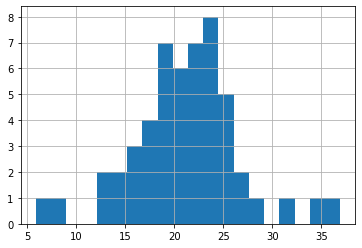

In [52]:
df_by_state['PCT_AMT_FHA'] = 100.0 * df_by_state['AMT_FHA']  / df_by_state['AMT_ALL']

# This sure looks different than the census-tract level histogram!
df_by_state['PCT_AMT_FHA'].hist(bins=20)

You can also specify a specific aggregation function per column:

In [53]:
usps_groups['NUM_FHA', 'NUM_ALL'].agg({'NUM_FHA': np.sum, 'NUM_ALL': np.mean}).head()

/Users/juanito/miniconda3/envs/ds-uib/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,NUM_FHA,NUM_ALL
USPS,,
AK,1850,49.079470
AL,9267,32.163669
AR,5663,37.946429
AZ,22360,52.276581
CA,88650,39.154278


The groupby function is especially useful when you define your own aggregation functions. Here, we define a function that returns the row for the census track located farthest to the north. The apply function attempts to 'combine results together in an intelligent way.' The list of Series objects from each call to `farthest_north` for each USPS code is collapsed into a single DataFrame table.

In [54]:
def farthest_north(state_df):
    # descending sort, then select row 0
    # the datatype will be a pandas Series
    return state_df.sort_values('INTPTLAT', ascending=False).iloc[0]

df_joined.groupby('USPS').apply(farthest_north)[:10]

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
USPS,,,,,,,,,,,,,,,,,,
AK,2.0,185.0,1.00,11,8,72.72730,1958,1604,81.92030,2.185000e+09,7.580189,AK,2.532416e+08,378198536.0,97.777,146.023,71.287938,-156.685618
AL,1.0,71.0,9502.00,10,2,20.00000,700,216,30.85710,1.071950e+09,6.552508,AL,9.275512e+07,2986584.0,35.813,1.153,34.965286,-85.777448
AR,5.0,7.0,208.03,91,9,9.89011,9673,909,9.39729,5.007021e+09,9.177197,AR,1.397141e+07,295088.0,5.394,0.114,36.486278,-94.283383
AZ,4.0,5.0,21.00,38,10,26.31580,7078,1831,25.86890,4.005002e+09,8.864888,AZ,5.956008e+07,4650137.0,22.996,1.795,36.916588,-111.470183
CA,6.0,93.0,4.00,2,0,0.00000,741,0,0.00000,6.093000e+09,6.609349,CA,5.329775e+08,3118247.0,205.784,1.204,41.946648,-122.634808
CO,8.0,75.0,9659.00,5,0,0.00000,388,0,0.00000,8.075966e+09,5.963579,CO,1.425537e+09,3036714.0,550.403,1.172,40.924098,-103.073557
CT,9.0,3.0,5243.00,46,16,34.78260,6441,2580,40.05590,9.003524e+09,8.770594,CT,1.314194e+07,242922.0,5.074,0.094,42.024605,-72.530403
DC,11.0,1.0,16.00,41,10,24.39020,23623,6368,26.95680,1.100100e+10,10.070018,DC,2.650934e+06,35617.0,1.024,0.014,38.984972,-77.038232
DE,10.0,3.0,112.02,23,9,39.13040,5656,2370,41.90240,1.000301e+10,8.640649,DE,3.704573e+06,0.0,1.430,0.000,39.832216,-75.521217


## Sorting by indices and columns

We can sort by the row (or column) index.

In [55]:
df_by_state.sort_index(ascending=False).head()

,AMT_FHA,AMT_ALL,NUM_FHA,NUM_ALL,PCT_AMT_FHA
USPS,,,,,
WY,248573,1313697,1418,6644,18.921639
WV,282703,1675079,2129,11739,16.876995
WI,971178,7500688,7104,47913,12.947852
WA,3201463,17267705,15019,68902,18.540177
VT,77355,940893,421,4777,8.221445


We can also sort by the value in a column

In [56]:
df_by_state.sort_values('AMT_FHA', ascending=False).head()

,AMT_FHA,AMT_ALL,NUM_FHA,NUM_ALL,PCT_AMT_FHA
USPS,,,,,
CA,22607179,99817500,88650,307087,22.648513
TX,10789870,45870174,73549,243977,23.522627
FL,6866263,30754332,44511,157431,22.326165
NY,5578590,30631391,25019,101335,18.212003
VA,4713396,23048658,20495,85169,20.449763


## Unique values

As in SQL, pandas can compute unique values, value counts, and test for membership

In [57]:
df['State_Code'].unique()[:10]

array([ 8., 28., 40., 39., 12., 36., 48., 13., 17., 34.])

In [58]:
df['State_Code'].value_counts().head()

6.0     7872
48.0    5092
36.0    4629
12.0    4099
42.0    3184
Name: State_Code, dtype: int64

In [59]:
df[df['State_Code'].isin(df['State_Code'].head(3))]

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,5.556828
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,4.276666
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,5.375278
95,28.0,77.0,NaN,1,1,100.0,177,177,100.0,NaN,5.181784
139,40.0,127.0,978.00,1,1,100.0,119,119,100.0,4.012710e+10,4.787492
...,...,...,...,...,...,...,...,...,...,...,...
71875,28.0,89.0,307.00,1,0,0.0,24,0,0.0,2.808903e+10,3.218876
71883,8.0,105.0,9768.00,2,0,0.0,176,0,0.0,8.105977e+09,5.176150
71958,28.0,49.0,16.00,3,0,0.0,321,0,0.0,2.804900e+10,5.774552
71974,28.0,123.0,206.00,8,0,0.0,854,0,0.0,2.812302e+10,6.751101


## Handling missing and NA data


When you read in a CSV file / SQL database there are often "NA" (or "null", "None", etc.) values.  The CSV reader has a special field for specifying how this is denoted, and SQL has the built-in notion of NULL.  Pandas provides some tools for working with these -- they are generally similar to (and a little bit worse than) `R`.

Note that these methods are by default not in place -- that is, they create a new series and do not change the original one.

For more details: http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [60]:
df['GEOID'][:10]

0             NaN
1    2.804901e+10
2             NaN
3    3.911306e+10
4    1.210501e+10
5    1.208698e+10
6    3.903512e+10
7    1.210302e+10
8    3.611900e+10
9             NaN
Name: GEOID, dtype: float64

`.isnull()` and `.notnull()` test for null-ness and return a Boolean series.

In [61]:
df['GEOID'].isnull()[:10]

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: GEOID, dtype: bool

`.dropna()` removes the rows with null data

In [62]:
df['GEOID'].size, df['GEOID'].dropna().size

(72035, 71040)

`.fillna()` replaces N/A values with another value.  `.interpolate()` replaces null values by (linear, or quadratic, or...) interpolation.  There is support for indexing by times (not necessarily equally spaced), etc. in the documentation.

In [63]:
df['fill_0'] = df['GEOID'].fillna(0)                          # Fills constant value, here 0
df['fill_forward'] = df['GEOID'].fillna(method='ffill')       # Fill forwards
df['fill_back'] = df['GEOID'].fillna(method='bfill', limit=5) # Fill backwards, at most 5
df['fill_mean'] = df['GEOID'].fillna(df['GEOID'].mean())      # Fills constant value, here the mean (imputation)
df['fill_interp'] = df['GEOID'].interpolate()                 # Fills interpolated value
df[['GEOID', 'fill_0', 'fill_forward', 'fill_back', 'fill_mean', 'fill_interp']][:10]

,GEOID,fill_0,fill_forward,fill_back,fill_mean,fill_interp
0,NaN,0.000000e+00,NaN,2.804901e+10,2.837319e+10,NaN
1,2.804901e+10,2.804901e+10,2.804901e+10,2.804901e+10,2.804901e+10,2.804901e+10
2,NaN,0.000000e+00,2.804901e+10,3.911306e+10,2.837319e+10,3.358104e+10
3,3.911306e+10,3.911306e+10,3.911306e+10,3.911306e+10,3.911306e+10,3.911306e+10
4,1.210501e+10,1.210501e+10,1.210501e+10,1.210501e+10,1.210501e+10,1.210501e+10
5,1.208698e+10,1.208698e+10,1.208698e+10,1.208698e+10,1.208698e+10,1.208698e+10
6,3.903512e+10,3.903512e+10,3.903512e+10,3.903512e+10,3.903512e+10,3.903512e+10
7,1.210302e+10,1.210302e+10,1.210302e+10,1.210302e+10,1.210302e+10,1.210302e+10
8,3.611900e+10,3.611900e+10,3.611900e+10,3.611900e+10,3.611900e+10,3.611900e+10
9,NaN,0.000000e+00,3.611900e+10,4.811301e+10,2.837319e+10,4.211601e+10


### Note
N/A values are (usually) smartly ignored when performing other calculations on dataframes. For example, when using string methods on series:

In [64]:
text_series = df['GEOID'].replace(0, np.nan).apply(str)
print(text_series[:10])

0              nan
1    28049010301.0
2              nan
3    39113060300.0
4    12105012404.0
5    12086980800.0
6    39035120200.0
7    12103020700.0
8    36119003000.0
9              nan
Name: GEOID, dtype: object


In [65]:
text_series[:10].str.split('.')

0               [nan]
1    [28049010301, 0]
2               [nan]
3    [39113060300, 0]
4    [12105012404, 0]
5    [12086980800, 0]
6    [39035120200, 0]
7    [12103020700, 0]
8    [36119003000, 0]
9               [nan]
Name: GEOID, dtype: object

Applying mean on numeric data ignores NA's by default (check docs):

In [66]:
df['GEOID'].mean()

28373187313.969

## Manipulating strings

Element-wise string operations are available through the `.str` attribute.

In [67]:
states = df_joined['USPS'].dropna()
states[states.str.contains('A')].head()

12    GA
20    GA
23    LA
26    AZ
27    GA
Name: USPS, dtype: object

## Indices in Pandas

Pandas indices allow us to handle data naturally.  **Elements are associated based on their index, not their order.**

In [68]:
s1 = pd.Series([1,2,3], index=['a', 'b', 'c'])
s2 = pd.Series([3,2,1], index=['c', 'b', 'a'])
s1 + s2

a    2
b    4
c    6
dtype: int64

In [69]:
s3 = pd.Series([3,2,1], index=['c', 'd', 'e'])
s1 + s3

a    NaN
b    NaN
c    6.0
d    NaN
e    NaN
dtype: float64

Missing values get a NaN, but this can be replaced by a fill value of your choice.

In [70]:
s1.add(s3, fill_value=0)

a    1.0
b    2.0
c    6.0
d    2.0
e    1.0
dtype: float64

## Function application and mapping

For element-wise function application, the most straightforward thing to do is to apply numpy functions to these objects:

In [71]:
df1 = pd.DataFrame(np.arange(24).reshape(4,6))

np.sin(df1)

,0,1,2,3,4,5
0,0.000000,0.841471,0.909297,0.141120,-0.756802,-0.958924
1,-0.279415,0.656987,0.989358,0.412118,-0.544021,-0.999990
2,-0.536573,0.420167,0.990607,0.650288,-0.287903,-0.961397
3,-0.750987,0.149877,0.912945,0.836656,-0.008851,-0.846220


This relies on numpy functions automatically broadcasting themselves to work element-wise.  To apply a pure-python function to each element, use the `.applymap()` method.

In [72]:
df1.applymap(lambda x: "%.2f" % x)

,0,1,2,3,4,5
0,0.00,1.00,2.00,3.00,4.00,5.00
1,6.00,7.00,8.00,9.00,10.00,11.00
2,12.00,13.00,14.00,15.00,16.00,17.00
3,18.00,19.00,20.00,21.00,22.00,23.00


However, sometimes you want to compute things column-wise or row-wise.  In this case, you will need to use the `apply` method. 

For example, the following takes the range of each column.

In [73]:
df1.apply(lambda x: x.max() - x.min())

0    18
1    18
2    18
3    18
4    18
5    18
dtype: int64

And this takes the range of reach row.

In [74]:
df1.apply(lambda x: x.max() - x.min(), axis=1)

0    5
1    5
2    5
3    5
dtype: int64

### Pandas HTML data import example

Pandas takes a "batteries included" approach and throws in a whole lot of convenience functions.  For instance it has import functions for a variety of formats.  One of the pleasant surprises is a command `read_html` that's meant to automate the process of extracting tabular data from HTML.  In particular, it works pretty well with tables on Wikipedia.  

Let's do an example: We'll try to extract the list of the world's tallest structures from
http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world.

In [75]:
dfs = pd.read_html('http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world', header=0, parse_dates=False)

# There are several tables on the page.  By inspection we can figure out which one we want
tallest = dfs[3]
print(tallest.columns)
# The coordinates column needs to be fixed up.  This is a bit of string parsing:
def clean_lat_long(s):
    try:
        parts = s.split("/")
    except AttributeError:
        return (None, None)
    if len(parts) < 3:
        return (None, None)
    m = re.search(r"(\d+[.]\d+);[^\d]*(\d+[.]\d+)[^\d]", parts[2])
    if not m:
        return (None, None)
    return (m.group(1), m.group(2))

tallest['Clean_Coordinates'] = tallest['Coordinates'].apply(clean_lat_long)
tallest['Latitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[0])
tallest['Longitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[1])

# Et voila
tallest.head()

Index(['Category', 'Structure', 'Country', 'City', 'Height (meters)',
       'Height (feet)', 'Year built', 'Coordinates'],
      dtype='object')


,Category,Structure,Country,City,Height (meters),Height (feet),Year built,Coordinates,Clean_Coordinates,Latitude,Longitude
0,Building[4] (list),Burj Khalifa,United Arab Emirates,Dubai,829.8,2722.0,2010,25°11′50.0″N 55°16′26.6″E﻿ / ﻿25.197222°N 55.2...,"(None, None)",None,None
1,Compliant Tower,Petronius (oil platform),United States,Gulf of Mexico,640,2100.0,2000,29°06′30″N 87°56′30″W﻿ / ﻿29.10833°N 87.94167°W,"(None, None)",None,None
2,Self-supporting tower[5] (list),Tokyo Skytree,Japan,Tokyo,634,2080.0,2011,35°42′36.5″N 139°48′39″E﻿ / ﻿35.710139°N 139.8...,"(None, None)",None,None
3,Guyed steel lattice mast,KVLY-TV mast,United States,"Blanchard, North Dakota",629,2063.0,1963,47°20′32″N 97°17′21″W﻿ / ﻿47.34222°N 97.28917°W,"(None, None)",None,None
4,Hyperboloid structure,Canton Tower,China,Guangzhou,604,1982.0,2010,23°6′32″N 113°19′8″E﻿ / ﻿23.10889°N 113.31889°E,"(None, None)",None,None


**Exercise**

1. Parse the table rankings of [UK universities available on Wikipedia](https://en.wikipedia.org/wiki/Rankings_of_universities_in_the_United_Kingdom):

## Pandas Timestamps

Pandas comes with excellent tools for managing temporal data. Central to this is the Timestamp class, which can infer timestamps from many sensible inputs:

In [76]:
print(pd.Timestamp('July 4, 2016'))
print(pd.Timestamp('Monday, July 4, 2016'))
print(pd.Timestamp('Tuesday, July 4th, 2016'))  # notice it ignored 'Tuesday'
print(pd.Timestamp('Monday, July 4th, 2016 05:00 PM'))
print(pd.Timestamp('04/07/2016T17:20:13.123456'))
print(pd.Timestamp(1467651600000000000))  # number of ns since the epoch, 1/1/1970

2016-07-04 00:00:00
2016-07-04 00:00:00
2016-07-04 00:00:00
2016-07-04 17:00:00
2016-04-07 17:20:13.123456
2016-07-04 17:00:00


It can manage timestamps with timezones:

In [77]:
july4 = pd.Timestamp('Monday, July 4th, 2016 05:00 PM').tz_localize('US/Eastern')
labor_day = pd.Timestamp('9/5/2016 12:00', tz='US/Eastern')
thanksgiving = pd.Timestamp('11/24/2016 16:00')  # no timezone

Pandas can do calculations on Timestamps if they are both localized to the same timezone or neither has a timezone.

In [78]:
print(labor_day - july4)
# print thanksgiving - july4  # generates an error

62 days 19:00:00


The time series offsets are useful for calculating dates relative to another date. Observe it skips over weekend days but is oblivious to holidays. Pandas does support [Custom Calendars](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#holidays-holiday-calendars) if you need them.

In [79]:
from pandas.tseries.offsets import BDay, Day, BMonthEnd

print(july4 + Day(5))  # 5 calendar days later, a Saturday.
print(july4 + BDay(5))  # 5 business days later, or the following Monday.
print(july4 - BDay(1))  # 1 business day earlier, or the previous Friday.
print(july4 + BMonthEnd(1))  # last business day of the month.

2016-07-09 17:00:00-04:00
2016-07-11 17:00:00-04:00
2016-07-01 17:00:00-04:00
2016-07-29 17:00:00-04:00


Pandas can generate a range of dates. Here, we generate a list of business days in January of 2016:

In [80]:
business_days = pd.date_range('1/1/2016', '1/31/2016', freq='B')
business_days

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-18',
               '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22',
               '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
               '2016-01-29'],
              dtype='datetime64[ns]', freq='B')

This can in turn be used in as a DataFrame index:

In [81]:
time_df = pd.DataFrame(np.random.rand(len(business_days)),
                    index=business_days,
                   columns=['random'])
time_df.head()

,random
2016-01-01,0.433120
2016-01-04,0.504100
2016-01-05,0.676880
2016-01-06,0.152224
2016-01-07,0.800665


The same timezone functions are still available.

In [82]:
time_df.tz_localize('UTC').tz_convert('US/Pacific').head()

,random
2015-12-31 16:00:00-08:00,0.433120
2016-01-03 16:00:00-08:00,0.504100
2016-01-04 16:00:00-08:00,0.676880
2016-01-05 16:00:00-08:00,0.152224
2016-01-06 16:00:00-08:00,0.800665


## Multi-indices, stacking, and pivot tables

Data frames can contain multiple indices for rows or columns.  For example, grouping by two columns will produce a two-level row index.

In [83]:
grouped = df.groupby(['State_Code', 'County_Code'])[['NUM_ALL', 'NUM_FHA']].sum()
grouped.head()

NUM_ALL  NUM_FHA
State_Code County_Code                  
1.0        1.0              466      147
           3.0             2565      417
           5.0               52        8
           7.0               68       20
           9.0              352       97

A row index can be converted into a column index with the `.unstack()` method:

In [84]:
grouped.unstack().head()

NUM_ALL                                                    \
County_Code    1.0     3.0     5.0   6.0     7.0    9.0    11.0  12.0    
State_Code                                                               
1.0            466.0  2565.0    52.0   NaN    68.0  352.0    9.0   NaN   
2.0              NaN     NaN     NaN   NaN     NaN    NaN    NaN   NaN   
4.0             91.0   877.0  1160.0   NaN   416.0  248.0    8.0  38.0   
5.0            117.0    53.0   358.0   NaN  3635.0  311.0   17.0   NaN   
6.0          13591.0    17.0   408.0   NaN  1629.0  611.0  135.0   NaN   

                            ... NUM_FHA                                      \
County_Code    13.0  14.0   ...   750.0 760.0 770.0 775.0 790.0 800.0 810.0   
State_Code                  ...                                               
1.0             64.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2.0              1.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4.0          50275.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5.0             29.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6.0          11974.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                               
County_Code 820.0 830.0 840.0  
State_Code                     
1.0           NaN   NaN   NaN  
2.0           NaN   NaN   NaN  
4.0           NaN   NaN   NaN  
5.0           NaN   NaN   NaN  
6.0           NaN   NaN   NaN  

[5 rows x 646 columns]

And the `.stack()` method does the opposite:

In [85]:
np.all(grouped.unstack().stack() == grouped)

True

This can be done with one step with the `pivot_table()` function.

In [86]:
pd.pivot_table(df, index='State_Code', columns='County_Code',
               values=['NUM_ALL', 'NUM_FHA'], aggfunc=np.sum).head()

NUM_ALL                                                    \
County_Code    1.0     3.0     5.0   6.0     7.0    9.0    11.0  12.0    
State_Code                                                               
1.0            466.0  2565.0    52.0   NaN    68.0  352.0    9.0   NaN   
2.0              NaN     NaN     NaN   NaN     NaN    NaN    NaN   NaN   
4.0             91.0   877.0  1160.0   NaN   416.0  248.0    8.0  38.0   
5.0            117.0    53.0   358.0   NaN  3635.0  311.0   17.0   NaN   
6.0          13591.0    17.0   408.0   NaN  1629.0  611.0  135.0   NaN   

                            ... NUM_FHA                                      \
County_Code    13.0  14.0   ...   750.0 760.0 770.0 775.0 790.0 800.0 810.0   
State_Code                  ...                                               
1.0             64.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2.0              1.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4.0          50275.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5.0             29.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6.0          11974.0   NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                               
County_Code 820.0 830.0 840.0  
State_Code                     
1.0           NaN   NaN   NaN  
2.0           NaN   NaN   NaN  
4.0           NaN   NaN   NaN  
5.0           NaN   NaN   NaN  
6.0           NaN   NaN   NaN  

[5 rows x 646 columns]

You may already by familiar with pivot tables in Excel.  These work similarly, and area  good tool for changing the dependent and independent variables for aggregations of data. See http://pandas.pydata.org/pandas-docs/stable/reshaping.html for more information.

## Plugging into more advanced analytics

Almost any "advanced analytics" tool in the Python ecosystem is going to take as input `np.array` type arrays.  You can access the underlying array of a data frame column as

        df['column'].values
        
Many of them take `nd.array` whose underlying data can be accessed by 

        df.values
        
directly.  *Most* of the time, they will take `df['column']` and `df` without needing to look at values.

This is particularly important if you want to use Pandas with the sklearn library. See this [blog post](http://www.markhneedham.com/blog/2013/11/09/python-making-scikit-learn-and-pandas-play-nice/) for an example.

### Exit Tickets
1. Describe several situations where you would prefer to use Pandas, and several where you'd prefer SQL.
1. Write the syntax for slicing the rows of a dataframe according to a filtering criterion.
1. Write the syntax for selecting, adding, or removing columns of a dataframe.

In [87]:
### This will load the iris dataset.
### Perfom a Exploratory Data Analysis using pandas

from sklearn.datasets import load_iris

iris_data = load_iris()

print(iris_data.DESCR)

df= pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['label'] = iris_data.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========